# diabete Classification

Using SVM, Linear Regression, RF, DT, KNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/anchanghun/Downloads/diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

# 인코딩된 데이터프레임 확인
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
y = df['Outcome']


In [5]:
X = df.drop('Outcome',axis=1)
X = X.values

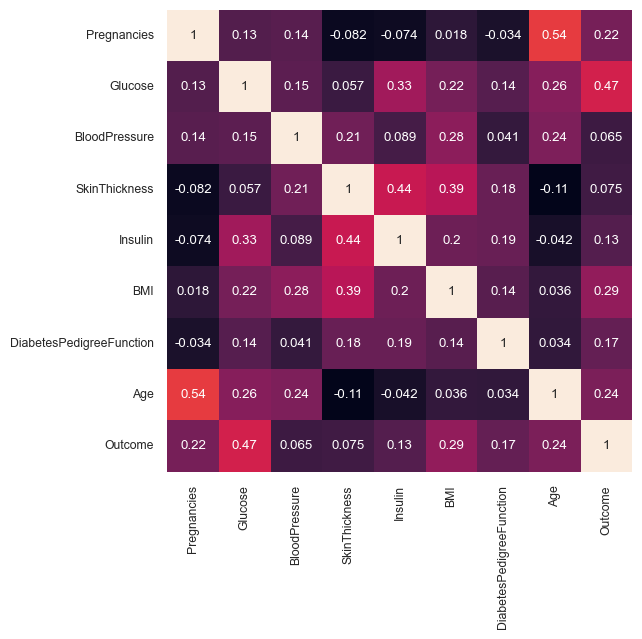

In [6]:

df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
# 특성 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [39]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                90        
                                                                 
 dense_17 (Dense)            (None, 8)                 88        
                                                                 
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 239 (956.00 Byte)
Trainable params: 239 (956.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
epochs = 30
model_history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6205 - val_loss: 0.5975 - val_accuracy: 0.7403
Epoch 2/30
20/20 [==============================] - 0s 788us/step - loss: 0.6144 - accuracy: 0.6824 - val_loss: 0.5460 - val_accuracy: 0.7597
Epoch 3/30
20/20 [==============================] - 0s 926us/step - loss: 0.5832 - accuracy: 0.6922 - val_loss: 0.5148 - val_accuracy: 0.7662
Epoch 4/30
20/20 [==============================] - 0s 967us/step - loss: 0.5634 - accuracy: 0.7052 - val_loss: 0.4929 - val_accuracy: 0.7857
Epoch 5/30
20/20 [==============================] - 0s 989us/step - loss: 0.5493 - accuracy: 0.7134 - val_loss: 0.4774 - val_accuracy: 0.7987
Epoch 6/30
20/20 [==============================] - 0s 865us/step - loss: 0.5378 - accuracy: 0.7296 - val_loss: 0.4659 - val_accuracy: 0.7922
Epoch 7/30
20/20 [==============================] - 0s 829us/step - loss: 0.5270 - accuracy: 0.7427 - val_loss: 0.4549 - val_accuracy: 0.7857
Epoch 8/

In [42]:
y_pred

array([[0.9049745 ],
       [0.09786231],
       [0.07020488],
       [0.8067751 ],
       [0.11704139],
       [0.05544436],
       [0.7879555 ],
       [0.88765806],
       [0.53542006],
       [0.33653295],
       [0.7102845 ],
       [0.9045288 ],
       [0.3641956 ],
       [0.37858057],
       [0.10596938],
       [0.1474002 ],
       [0.89271903],
       [0.052352  ],
       [0.47529638],
       [0.16535465],
       [0.7888656 ],
       [0.58349276],
       [0.18710895],
       [0.11546482],
       [0.05960419],
       [0.3425545 ],
       [0.06593699],
       [0.7984551 ],
       [0.08166311],
       [0.121923  ],
       [0.57313764],
       [0.22410177],
       [0.08760183],
       [0.6007219 ],
       [0.09359191],
       [0.6997079 ],
       [0.474888  ],
       [0.06757368],
       [0.33846882],
       [0.78120387],
       [0.33471715],
       [0.23182318],
       [0.09491535],
       [0.7951499 ],
       [0.76439244],
       [0.06533115],
       [0.07671637],
       [0.139

In [43]:
#y_test_class = np.argmax(y_test,axis=1)
#y_pred_class = np.argmax(y_pred,axis=1)

y_test_class = y_test
y_pred_class = y_pred

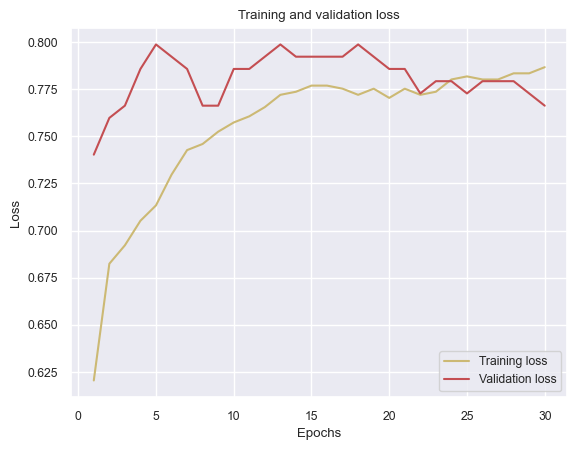

In [44]:


loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

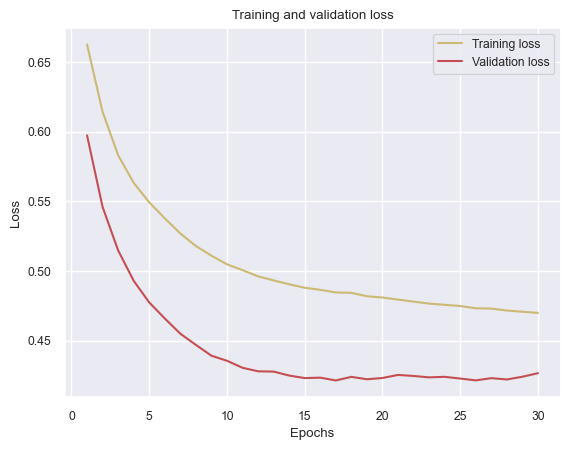

In [45]:


loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred = model.predict(X_test)

# Convert probabilities to class labels (binary classification: 0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)

# Assuming y_test_class is already in discrete class format
# Print classification report and confusion matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

5/5 [==============================] - 0s 978us/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.62      0.60      0.61        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154

[[90 17]
 [19 28]]


In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.62      0.60      0.61        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154

[[90 17]
 [19 28]]


In [48]:
# 데이터 스케일링 (SVM, KNN 같은 모델에 필수)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# 2. Logistic Regression (LR)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 3. Random Forest (RF)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 4. Decision Tree (DT)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 5. k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

SVM Accuracy: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

Logistic Regression Accuracy: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Random Forest Accuracy: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.71      0.72      0.72        47

    accuracy                           0.82       154
   